In [1]:
%matplotlib inline

import numpy as np

# чуть более красивые картинки
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import scipy as sp

np.random.seed(228)

In [2]:
def plot_std(std, distr_name, theta, size):
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.lineplot(x=range(1, len(std) + 1), y=std, label="Оценка методом моментов", marker="o")
    plt.title(f"Оценка методом моментов {distr_name} распределения с параметром θ={theta} и размером выборки {size}")
    plt.xlabel("k")
    plt.ylabel("error")
    plt.tight_layout()
    plt.show()

## Равномерное распределение

![img](https://nsu.ru/mmf/tvims/chernova/ms/lec/img249.gif)

$$
\begin{align}
\theta_k^* = \sqrt[k] {(k + 1) \overline{X^k}}
\end{align}
$$

In [3]:
def method_of_moments_uniform(x, k):
    return np.power((k + 1) * np.mean(np.power(x, k)), 1 / k)

In [4]:
def calculate_uniform(theta, size, num_iters = 1000, max_k=100):
    stds = []
    for k in range(1, max_k):
        errors = []
        for _ in range(num_iters):
            x = np.random.uniform(0, theta, size=size)
            theta_m_o_m = method_of_moments_uniform(x, k)
            errors.append(np.square(theta - theta_m_o_m))
        std = np.sqrt(np.mean(errors))
        stds.append(std)
    plot_std(stds, "равномерного", theta, size)

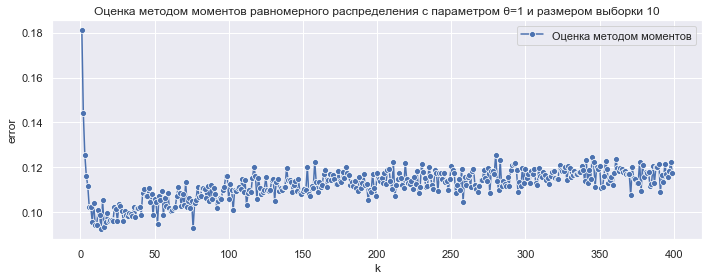

In [5]:
calculate_uniform(theta=1, size=10, max_k=400)

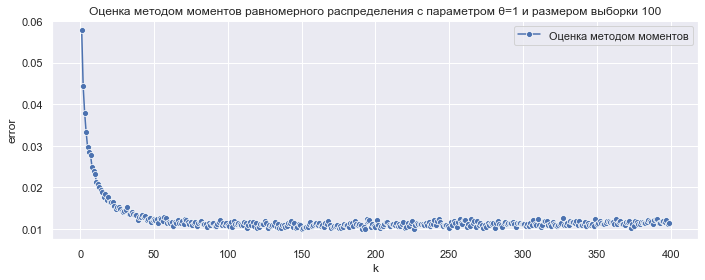

In [6]:
calculate_uniform(theta=1, size=100, max_k=400)

#### вывод 1
размер выборки крайне влияет на ско

#### вывод 2
ско уменьшается с увеличением k

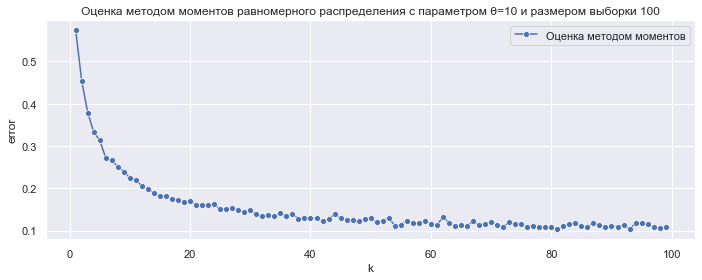

In [7]:
calculate_uniform(theta=10, size=100)

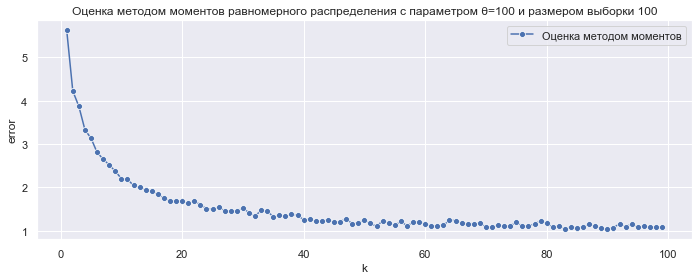

In [8]:
calculate_uniform(theta=100, size=100)

#### вывод 3
ско увеличивается (линейно) с увеличением θ, но графики, с точностью до масштаба осей, очень похожи

## Экспоненциальное распределение

$$
\begin{align}
\theta_k^* = \left(\frac{k!}{\overline{X^k}} \right)^{1/k}
\end{align}
$$

In [9]:
def method_of_moments_exp(x, k):
    return np.power(np.mean(np.power(x, k)/ sp.special.factorial(k)), 1 / k)

In [10]:
def calculate_exp(theta, size, num_iters = 1000, max_k=40):
    stds = []
    for k in range(1, max_k):
        errors = []   
        for _ in range(num_iters):
            x = np.random.exponential(theta, size=size)
            theta_m_o_m = method_of_moments_exp(x, k)
            errors.append(np.square(theta - theta_m_o_m))
        std = np.sqrt(np.mean(errors))
        stds.append(std)
    plot_std(stds, "экспоненциального", theta, size)

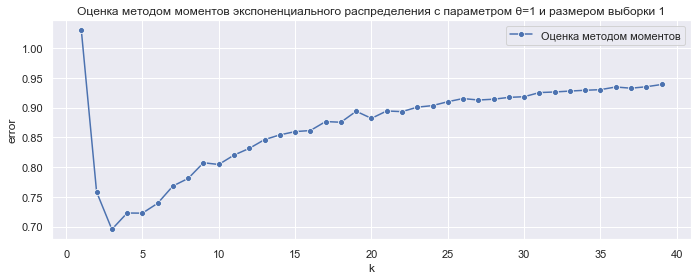

In [11]:
calculate_exp(theta=1, size=1)

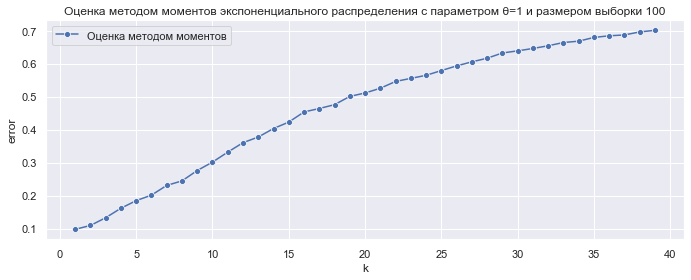

In [12]:
calculate_exp(theta=1, size=100)

#### вывод 1
размер выборки влияет на ско

#### вывод 2
ско увеличивается с увеличением k

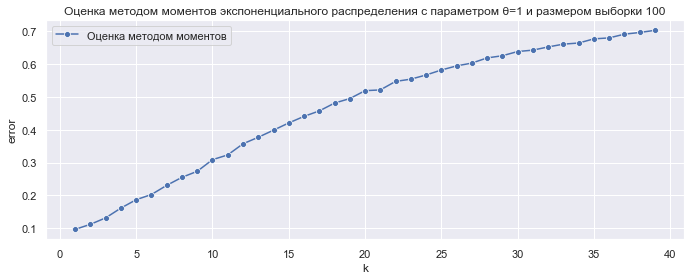

In [13]:
calculate_exp(theta=1, size=100)

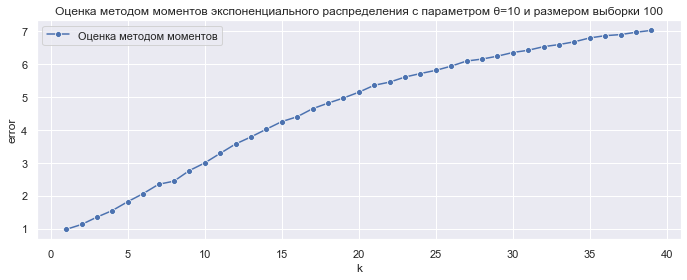

In [14]:
calculate_exp(theta=10, size=100)

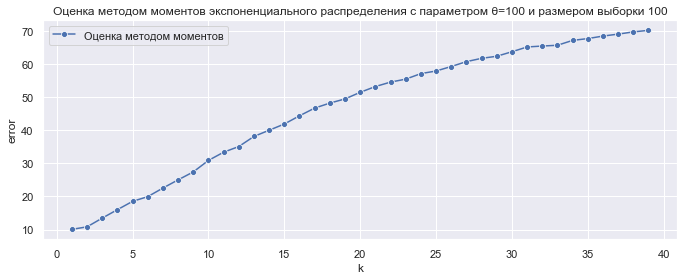

In [15]:
calculate_exp(theta=100, size=100)

#### вывод 3
ско увеличивается (линейно) с увеличением θ, но графики, с точностью до масштаба осей, очень похожи